# import libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [61]:
# Read the data
train_dt = pd.read_csv('C:\\Users\\maian\\Downloads\\just-ai-249-machine-learning-lab-competition (2)\\spambase_train.csv')
test_dt = pd.read_csv('C:\\Users\\maian\\Downloads\\just-ai-249-machine-learning-lab-competition (2)\\spambase_test.csv')
train_dt.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


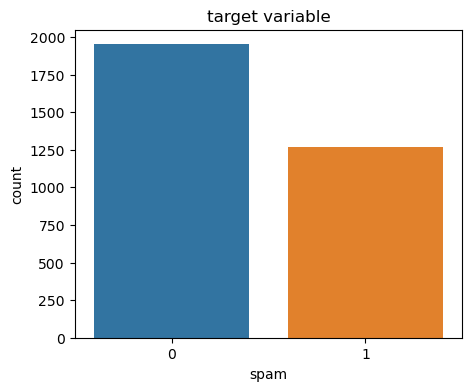

In [62]:
plt.figure(figsize=(5,4))
sns.countplot(x=train_dt['spam'])
plt.title('target variable')
plt.show()
              
              

# preprocessing data

In [63]:
# # Drop the ID and spam columns
y_train = train_dt['spam']
x_train = train_dt.drop(['spam', 'ID'], axis=1)


In [64]:
# Divide the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.01, random_state=42)


In [65]:
param_grid = {
    'n_estimators': [130, 150, 130, 220],
    'max_depth': [15, 25, 35, 45],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [2, 3, 5],
    'bootstrap': [True, False]
}

# random forest

In [66]:
# Create the random forest classifier
rf = RandomForestClassifier(random_state=42)

In [67]:
# Execute grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)


In [68]:
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [15, 25, 35, 45],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [3, 6, 9],
                         'n_estimators': [130, 150, 130, 220]},
             scoring='accuracy', verbose=2)

In [69]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'bootstrap': False, 'max_depth': 45, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150}


# training model


In [70]:
# Train the random forest with the best hyperparameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=45, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=150, random_state=42)

In [71]:
# Make predictions on the validation set
rf_y_pred = best_rf.predict(x_val)


In [72]:
# Calculate and print the accuracy and F1 score
accuracy = accuracy_score(y_val, rf_y_pred)
f1 = f1_score(y_val, rf_y_pred)
print(f'Accuracy of the tuned Random Forest model: {accuracy }')
print(f'F1 score of the tuned Random Forest model: {f1}')


Accuracy of the tuned Random Forest model: 0.9696969696969697
F1 score of the tuned Random Forest model: 0.9655172413793104


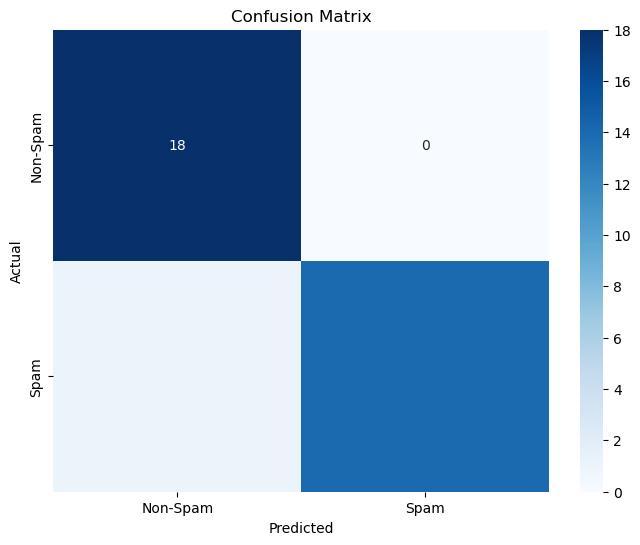

In [73]:
# creat Plot confusion matrix
cm = confusion_matrix(y_val, rf_y_pred)
plt.figure(figsize=(8, 6))
# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# Prepare test set data
test_id = test_dt['ID'].copy()
x_test = test_dt.drop('ID', axis=1)


In [75]:
rf_submission = pd.DataFrame({'ID': test_id, 'spam': best_rf.predict(x_test)})

In [76]:
# Save the test set data to a CSV file
csv_file = 'rf.csv'
rf_submission.to_csv(csv_file, index=False)


print(rf_submission.head())

     ID  spam
0  1981     0
1  1940     0
2  4260     1
3  3200     1
4  3082     1


In [ ]:
name: maian ayman